## 3DCORE and GCS in python

first do:

    git clone https://github.com/johan12345/gcs_python
    cd gcs_python
    pip install .

to run gui on command line: (works only on Mac so far because backend problem on Linux)

    python -m gcs.gui "2020-04-15 06:00" STA SOHO

In [6]:
import argparse
import corner
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
import numba
import numpy as np
import os
import pickle
import socket
import sys
import time
import astroquery
#import PyQt5 #need to install gcs first

import gcs #git clone from from https://github.com/johan12345/gcs_python
from gcs.geometry import gcs_mesh


import heliosat
import py3dcore

In [7]:
#matplotlib.use('qt5Agg')
%matplotlib inline

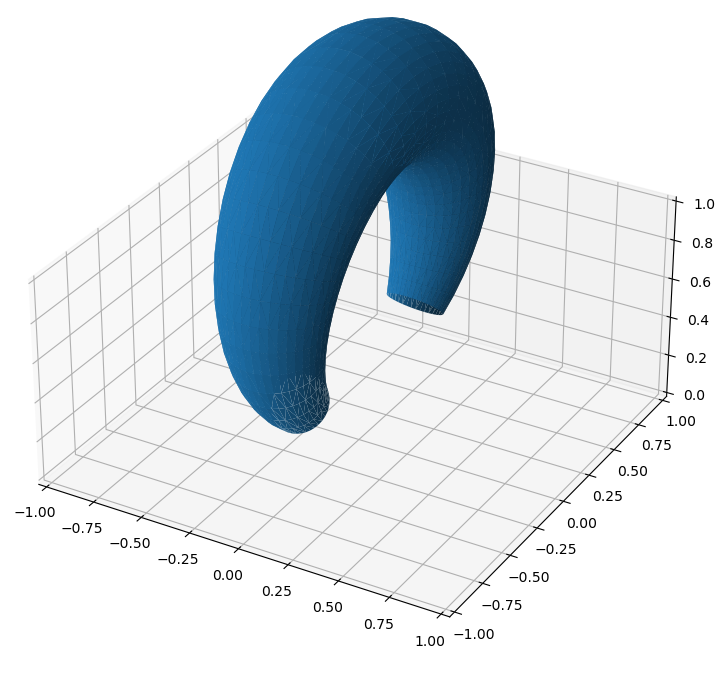

In [8]:
fig=plt.figure(1,figsize=(12,9),dpi=100)
ax = fig.add_subplot(111, projection=Axes3D.name)

#width, distance, footpoints, resolution torus, resolution cross section, thickness
mesh, u, v = gcs_mesh(np.radians(50), 2, 0, 20, 40, 0.2)
tri = mtri.Triangulation(u, v)

ax.plot_trisurf(*mesh.T, triangles=tri.triangles)
ax.set_xlim3d([-1, 1])
ax.set_ylim3d([-1, 1])
ax.set_zlim3d([0, 1])
ax.set_box_aspect([1, 1, 0.5])

plt.show()

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  2.01file/s]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
/home/cmoestl/miniconda/envs/solo/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/home/cmoestl/miniconda/envs/solo/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(r

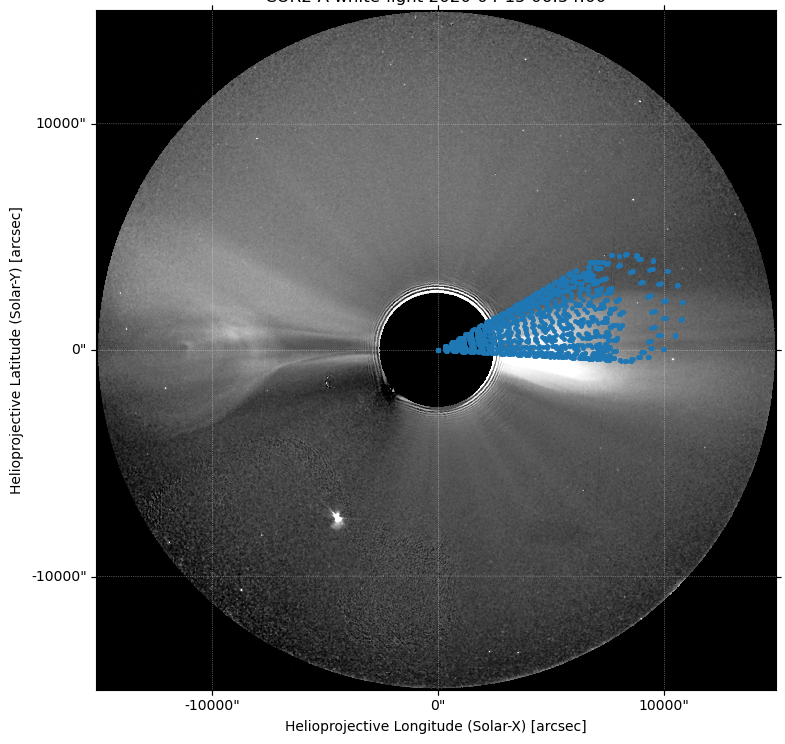

In [9]:
from sunpy.map import Map
from sunpy.net import helioviewer

from gcs.geometry import gcs_mesh_sunpy
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# create GCS mesh
date = dt.datetime(2020, 4, 15, 6, 54)
half_angle = 25
height = 8.79
kappa = 0.26
lat = np.radians(10)
lon = np.radians(354)
tilt = np.radians(5)

mesh = gcs_mesh_sunpy(date, half_angle, height, 20, 20, 20, kappa, lat, lon, tilt)

# download STEREO-A COR2 image
hv = helioviewer.HelioviewerClient()
f = hv.download_jp2(date, observatory='STEREO_A', instrument='SECCHI', detector='COR2')
#f = hv.download_jp2(date, observatory='STEREO_A', instrument='SECCHI', detector='COR2')
map = Map(f)

# plot image
fig=plt.figure(1,figsize=(12,9),dpi=100)
ax = plt.subplot(projection=map)

map.plot(cmap='Greys_r')

# plot GCS mesh
ax.plot_coord(mesh, '.', ms=5)

plt.show()